### European Soccer

#### Objective: Build a predictive model for soccer outcomes (i.e. win/loss/tie) that out-performs the base case and approaches or surpasses the experts.


#### Potential predictors to use:

1.) Home Team Historic Win % (Last 1 Wk, Last 2 Wks, Last yr, etc...)

2.) Away Team Historic Win % 

3.) Home Total Player Rating

4.) Away Total Player Rating

5.) Historic Matchup Outcome (i.e. between specific teams)

6.) Home Field Advantage

7.) Bookie Predictions (?)

    -> Potentially grade each bookie and weight their predictions based on historical success similar to Turk HW

#### Compare Model Results Against:

1.) Actual Outcomes

2.) Aggregate Bookie Odds

#### Eliminate from data:

1.) Formations

2.) Detailed in game statistics (i.e. corners, shots on goal, fouls, etc...) (?)

2.) All player ratings but the Overall Rating (?)

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
import os
import sklearn
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

In [2]:
with sqlite3.connect('C:\\Users\\Sean\\Desktop\\soccer\\database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    player = pd.read_sql_query("SELECT * from Player", con)
    playerstats = pd.read_sql_query("SELECT * from Player_Stats", con)

In [3]:
player_ratings = pd.read_csv("C:\Users\Sean\Desktop\MIS381_Project-master (5)\MIS381_Project-master\PlayerRatings_2.csv")

In [4]:
est = pd.read_csv("C:\\Users\\Sean\\Desktop\\MIS381_Project-master (5)\\MIS381_Project-master\\new_columns2.csv")

In [5]:
def get_av_w(row):
    if row["bet_avg_winner"] == "home":
        return 1
    elif row["bet_avg_winner"] == "tie":
        return 0
    else:
        return 2

def get_av_v(row):
    if row["bet_vote"] == "home":
        return 1
    elif row["bet_vote"] == "tie":
        return 0
    else:
        return 2

est['dummy_bet_avg_win'] = est.apply(lambda row: get_av_w(row), axis = 1)    
est['dummy_bet_avg_vote'] = est.apply(lambda row: get_av_v(row), axis = 1)   

est = est.drop(["bet_avg_winner","bet_vote"],1)


In [6]:
matches = pd.concat([matches,est],1)

In [7]:
matches  = pd.concat([matches,player_ratings],1)

In [8]:
def get_winner(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 1
    elif row['home_team_goal'] < row['away_team_goal']:
        return 2
    else:
        return 0

matches['winner'] = matches.apply(lambda row: get_winner(row), axis = 1)

In [10]:
j=""
for i in matches.columns:
    j = j +"'"+ i+"'" + ","
print j

'id','country_id','league_id','season','stage','date','match_api_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','home_player_X1','home_player_X2','home_player_X3','home_player_X4','home_player_X5','home_player_X6','home_player_X7','home_player_X8','home_player_X9','home_player_X10','home_player_X11','away_player_X1','away_player_X2','away_player_X3','away_player_X4','away_player_X5','away_player_X6','away_player_X7','away_player_X8','away_player_X9','away_player_X10','away_player_X11','home_player_Y1','home_player_Y2','home_player_Y3','home_player_Y4','home_player_Y5','home_player_Y6','home_player_Y7','home_player_Y8','home_player_Y9','home_player_Y10','home_player_Y11','away_player_Y1','away_player_Y2','away_player_Y3','away_player_Y4','away_player_Y5','away_player_Y6','away_player_Y7','away_player_Y8','away_player_Y9','away_player_Y10','away_player_Y11','home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_p

In [65]:
j=""
for i in est.columns:
    j = j +"'"+ i+"'" + ","
print j

'Unnamed: 0','match_api_id','trailing5_home','trailing5_away','h2h','trailing10_home','trailing10_away','home_bet_avg','away_bet_avg','tie_bet_avg','dummy_bet_avg_win','dummy_bet_avg_vote',


Players, Player Ratings, Past Team Performance, and Betting Markets

Total correct: 0.571690113702

Correct prediction of win:  0.567071487717
Correct prediction of lose:  0.555027422303
Correct prediction of tie:  0.770780856423


          Tie  Home Win  Away Win
                                 
Tie       306      1750       638
Home Win   42      4109       579
Away Win   49      1387      1518


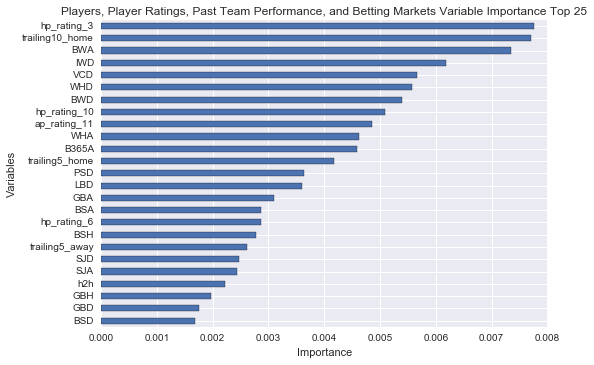

In [13]:


#betting_houses_dummy = pd.get_dummies(matches[["B365H","B365D","B365A",'BWH','BWD','BWA','IWH','IWD','IWA','LBH','LBD','LBA','PSH','PSD','PSA','WHH','WHD','WHA','SJH',\
#                                'SJD','SJA','VCH','VCD','VCA','GBH','GBD','GBA','BSH','BSD','BSA',"country_id","league_id"]])


variables=[['hp_rating_1','hp_rating_2','hp_rating_3','hp_rating_4','hp_rating_5','hp_rating_6','hp_rating_7','hp_rating_8','hp_rating_9',\
       'hp_rating_10','hp_rating_11','ap_rating_1','ap_rating_2','ap_rating_3','ap_rating_4','ap_rating_5','ap_rating_6','ap_rating_7',\
       'ap_rating_8','ap_rating_9','ap_rating_10','ap_rating_11','hp_total','ap_total'],\
           ["B365H","B365D","B365A",'BWH','BWD','BWA','IWH','IWD',\
        'IWA','LBH','LBD','LBA','PSH','PSD','PSA','WHH','WHD','WHA','SJH','SJD','SJA','VCH','VCD','VCA','GBH','GBD','GBA','BSH','BSD','BSA'],\
          ['trailing5_home','trailing5_away','h2h','trailing10_home','trailing10_away','dummy_bet_avg_win','dummy_bet_avg_vote'],\
          ['hp_rating_1','hp_rating_2','hp_rating_3','hp_rating_4','hp_rating_5','hp_rating_6','hp_rating_7','hp_rating_8','hp_rating_9',\
       'hp_rating_10','hp_rating_11','ap_rating_1','ap_rating_2','ap_rating_3','ap_rating_4','ap_rating_5','ap_rating_6','ap_rating_7',\
       'ap_rating_8','ap_rating_9','ap_rating_10','ap_rating_11','hp_total','ap_total','trailing5_home','trailing5_away','h2h','trailing10_home',\
           'trailing10_away'],\
          ['home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8',\
           'home_player_9','home_player_10','home_player_11','away_player_1','away_player_2','away_player_3','away_player_4','away_player_5',\
           'away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11',\
           'hp_rating_1','hp_rating_2','hp_rating_3','hp_rating_4','hp_rating_5','hp_rating_6','hp_rating_7','hp_rating_8','hp_rating_9',\
           'hp_rating_10','hp_rating_11','ap_rating_1','ap_rating_2','ap_rating_3','ap_rating_4','ap_rating_5','ap_rating_6','ap_rating_7',\
           'ap_rating_8','ap_rating_9','ap_rating_10','ap_rating_11','hp_total','ap_total'],\
          ['home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8',\
           'home_player_9','home_player_10','home_player_11','away_player_1','away_player_2','away_player_3','away_player_4','away_player_5',\
           'away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11',\
           'hp_rating_1','hp_rating_2','hp_rating_3','hp_rating_4','hp_rating_5','hp_rating_6','hp_rating_7','hp_rating_8','hp_rating_9',\
           'hp_rating_10','hp_rating_11','ap_rating_1','ap_rating_2','ap_rating_3','ap_rating_4','ap_rating_5','ap_rating_6','ap_rating_7',\
           'ap_rating_8','ap_rating_9','ap_rating_10','ap_rating_11','hp_total','ap_total','trailing5_home','trailing5_away','h2h','trailing10_home',\
           'trailing10_away'],
          ['home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8',\
           'home_player_9','home_player_10','home_player_11','away_player_1','away_player_2','away_player_3','away_player_4','away_player_5',\
           'away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11','trailing5_home','trailing5_away',\
           'h2h','trailing10_home','trailing10_away'],\
          ['home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8',\
           'home_player_9','home_player_10','home_player_11','away_player_1','away_player_2','away_player_3','away_player_4','away_player_5',\
           'away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11',\
           'hp_rating_1','hp_rating_2','hp_rating_3','hp_rating_4','hp_rating_5','hp_rating_6','hp_rating_7','hp_rating_8','hp_rating_9',\
           'hp_rating_10','hp_rating_11','ap_rating_1','ap_rating_2','ap_rating_3','ap_rating_4','ap_rating_5','ap_rating_6','ap_rating_7',\
           'ap_rating_8','ap_rating_9','ap_rating_10','ap_rating_11','hp_total','ap_total','trailing5_home','trailing5_away','h2h','trailing10_home',\
           'trailing10_away',"B365H","B365D","B365A",'BWH','BWD','BWA','IWH','IWD','IWA','LBH','LBD','LBA','PSH','PSD','PSA','WHH','WHD','WHA','SJH',\
           'SJD','SJA','VCH','VCD','VCA','GBH','GBD','GBA','BSH','BSD','BSA']]

labels = ["Just Ratings", "Just Betting Houses","Just Past Team Performance",\
          "Player Rating with Past Team Performance","Players and Player Ratings","Players, Player Ratings, and Past Team Performance",\
          "Players and Past Team Performance", "Players, Player Ratings, Past Team Performance, and Betting Markets"]


i = 7

if i<len(labels):
    print labels[i]
    print

    plot_title = labels[i] + " Variable Importance"

    X = matches[variables[i]].as_matrix().astype(np.float)
    y = matches['winner'].as_matrix().astype(np.float)

    offset = int(X.shape[0] * 0.4)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
    X_train, y_train = np.nan_to_num(X_train), np.nan_to_num(y_train)

    ### works fine when init is None
    clf_init = None
    clf = GradientBoostingClassifier()
    clf.fit(np.nan_to_num(X_train), np.nan_to_num(y_train))

    X_test, y_test = np.nan_to_num(X_train), np.nan_to_num(y_train)
    y_pred = clf.predict(X_test)

    y_test_df = pd.DataFrame(y_test)
    y_test_pred_df = pd.DataFrame(y_pred)

    result = pd.concat([y_test_pred_df,y_test_df],axis=1)
    result.columns = ["predict","actual"]
    same = (result["predict"]==result["actual"])*1


    cor = ((result["predict"]==1)*1)*((result["predict"]==result["actual"])*1)+((result["predict"]==2)*1)*\
    ((result["predict"]==result["actual"])*1)+((result["predict"]==0)*1)*((result["predict"]==result["actual"])*1)
    percent_correct = float(cor.sum())/float(len(result))
    print "Total correct:", percent_correct
    print 


    if len(variables[i]) <= 30 :
        variable_Importance = pd.Series(clf.feature_importances_,index = matches[variables[i]].columns )
        variable_Importance = variable_Importance.sort_values(ascending = True)
        plt = variable_Importance.plot(kind = "barh")
        plt.set_title(plot_title)
        plt.set_xlabel("Importance")
        plt.set_ylabel("Variables")
        plt
    else:
        variable_Importance1 = pd.Series(clf.feature_importances_,index = matches[variables[i]].columns )
        variable_Importance1 = variable_Importance1.sort_values(ascending = True)
        variable_Importance = variable_Importance1[:25]
        
        plt = variable_Importance.plot(kind = "barh")
        plt.set_title(plot_title + " Top 25")
        plt.set_xlabel("Importance")
        plt.set_ylabel("Variables")
        plt

        



    ##############################

    correct_win = ((result["predict"]==1)*1)*((result["predict"]==result["actual"])*1)
    pred_win = (result["predict"]==1)*1
    correct_lose = ((result["predict"]==2)*1)*((result["predict"]==result["actual"])*1)
    pred_lose = (result["predict"]==2)*1
    correct_tie = ((result["predict"]==0)*1)*((result["predict"]==result["actual"])*1)
    pred_tie = (result["predict"]==0)*1

    correct_win_tot = correct_win.sum()
    correct_lose_tot = correct_lose.sum()
    correct_tie_tot = correct_tie.sum()

    pred_win_tot = pred_win.sum()
    pred_lose_tot = pred_lose.sum()
    pred_tie_tot = pred_tie.sum()

    pred_draw = pred_tie
    correct_draw = correct_tie

    print "Correct prediction of win: ", float(correct_win_tot)/float(pred_win_tot)
    print "Correct prediction of lose: ", float(correct_lose_tot)/float(pred_lose_tot)
    print "Correct prediction of tie: ", float(correct_tie_tot)/float(pred_tie_tot)

    conf_mat = pd.DataFrame(sklearn.metrics.confusion_matrix(result["actual"], result["predict"], labels=None))
    conf_mat.columns = ["Tie","Home Win","Away Win"]
    conf_mat[" "] = ["Tie","Home Win","Away Win"]
    conf_mat = conf_mat.set_index(" ")
    print
    print
    print conf_mat
    


In [17]:
X_train

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.73000000e+00,   3.40000000e+00,   4.20000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.91000000e+00,   3.25000000e+00,   3.60000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  3.95990000e+04,   2.44140000e+04,   2.44120000e+04, ...,
          1.91000000e+00,   3.10000000e+00,   4.20000000e+00],
       [  3.45300000e+04,   3.45340000e+04,   3.49520000e+04, ...,
          1.22000000e+00,   5.50000000e+00,   1.30000000e+01],
       [  2.45030000e+04,   3.97290000e+04,   3.93040000e+04, ...,
          1.75000000e+00,   3.25000000e+00,   4.75000000e+00]])

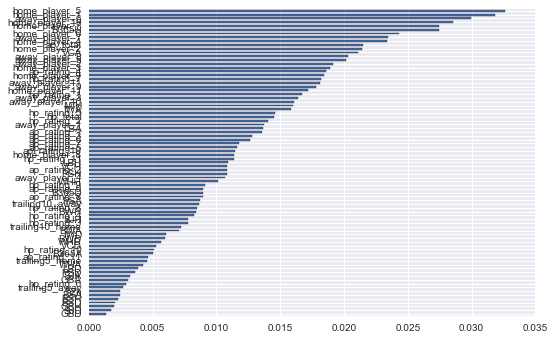

In [12]:
variable_Importance1 = pd.Series(clf.feature_importances_,index = matches[variables[i]].columns )
variable_Importance = variable_Importance1
variable_Importance = variable_Importance.sort_values(ascending = True)
plt = variable_Importance.plot(kind = "barh")

In [12]:
correct_win = ((result["predict"]==1)*1)*((result["predict"]==result["actual"])*1)
pred_win = (result["predict"]==1)*1
correct_lose = ((result["predict"]==2)*1)*((result["predict"]==result["actual"])*1)
pred_lose = (result["predict"]==2)*1
correct_tie = ((result["predict"]==0)*1)*((result["predict"]==result["actual"])*1)
pred_tie = (result["predict"]==0)*1

correct_win_tot = correct_win.sum()
correct_lose_tot = correct_lose.sum()
correct_tie_tot = correct_tie.sum()

pred_win_tot = pred_win.sum()
pred_lose_tot = pred_lose.sum()
pred_tie_tot = pred_tie.sum()

pred_draw = pred_tie
correct_draw = correct_tie

print "Correct prediction of win: ", float(correct_win_tot)/float(pred_win_tot)
print "Correct prediction of lose: ", float(correct_lose_tot)/float(pred_lose_tot)
print "Correct prediction of tie: ", float(correct_tie_tot)/float(pred_tie_tot)

conf_mat = pd.DataFrame(sklearn.metrics.confusion_matrix(result["actual"], result["predict"], labels=None))
conf_mat.columns = ["Tie","Home Win","Away Win"]
conf_mat[" "] = ["Tie","Home Win","Away Win"]
conf_mat = conf_mat.set_index(" ")
conf_mat

Correct prediction of win:  0.567071487717
Correct prediction of lose:  0.555027422303
Correct prediction of tie:  0.770780856423


,Tie,Home Win,Away Win
,,,
Tie,306,1750,638
Home Win,42,4109,579
Away Win,49,1387,1518


In [72]:
home_win_odd = matches[['BWH','IWH','LBH','PSH','WHH','SJH','VCH','GBH','BSH','B365H']]
home_lose_odd = matches[['BWA','IWA','LBA','PSA','WHA','SJA','VCA','GBA','BSA','B365A']]
draw_odd= matches[['BWD','IWD','LBD','PSD','WHD','SJD','VCD','GBD','BSD','B365D']]

home_win_odd_max=home_win_odd.max(1)
home_lose_odd_max= home_lose_odd.max(1)
draw_odd_max = draw_odd.max(1)

home_win_odd_min=home_win_odd.min(1)
home_lose_odd_min= home_lose_odd.min(1)
draw_odd_min = draw_odd.min(1)

home_win_odd_idxmax=home_win_odd.idxmax(axis=1).value_counts()
home_lose_odd_idxmax= home_lose_odd.idxmax(axis=1).value_counts()
draw_odd_idxmax = draw_odd.idxmax(axis=1).value_counts()

home_win_odd_range=home_win_odd_max-home_win_odd_min
home_lose_odd_range= home_lose_odd_max-home_lose_odd_min
draw_odd_range = draw_odd_max-draw_odd_min

j[0] = home_win_odd_max - home_lose_odd_max
j[1] = (home_win_odd_max > 2)*1
def lol(t):
    if abs(t[0])<0.25 and j==1:
        return 1
j["t"]=j.apply(lambda x: lol(x) )

TypeError: 'str' object does not support item assignment

In [14]:
print "home_win_odd_idxmax"
print home_win_odd_idxmax
print
print "home_lose_odd_idxmax"
print home_lose_odd_idxmax
print
print "draw_odd_idxmax"
print draw_odd_idxmax


home_win_odd_idxmax
PSH      4255
IWH      3650
BWH      2937
WHH      2901
VCH      2808
SJH      2121
LBH      1740
B365H    1209
BSH       503
GBH       368
dtype: int64

home_lose_odd_idxmax
PSA      5475
VCA      4156
SJA      2923
IWA      2457
WHA      1968
BWA      1862
LBA      1604
B365A    1438
BSA       437
GBA       172
dtype: int64

draw_odd_idxmax
PSD      7774
VCD      3516
SJD      2531
BWD      2496
LBD      1740
B365D    1701
IWD      1375
WHD      1028
BSD       237
GBD        94
dtype: int64


In [15]:
mask = (home_win_odd_max-home_win_odd_min > 10)
matches[['BWH','IWH','LBH','PSH','WHH','SJH','VCH','GBH','BSH']][mask]

,BWH,IWH,LBH,PSH,WHH,SJH,VCH,GBH,BSH
12016,21.0,12.0,13.0,23.60,15.0,15.0,19.0,21.0,13.0
19126,14.0,9.5,20.0,26.00,15.0,NaN,26.0,NaN,NaN
19379,15.0,13.0,21.0,25.50,15.0,NaN,23.0,NaN,NaN
22642,21.0,14.0,17.0,NaN,23.0,23.0,29.0,17.0,17.0
23886,17.0,14.0,21.0,23.00,21.0,NaN,29.0,NaN,NaN
23961,16.5,15.0,19.0,22.40,21.0,NaN,26.0,NaN,NaN
24047,34.0,20.0,26.0,36.00,26.0,NaN,36.0,NaN,NaN
24437,19.0,15.0,19.0,25.51,21.0,NaN,23.0,NaN,NaN
24458,21.0,20.0,23.0,31.13,17.0,NaN,31.0,NaN,NaN


In [16]:

all_win_bets = (home_win_odd_max*pred_win)
all_win = (pred_win*correct_win*home_win_odd_max)
incor_win = correct_win.apply(lambda x: (x-1)**2)
losses = correct_win - pred_win


print "For betting on home winning:"
print "Total amount bet:  ",   pred_win.sum()
print "Total amount lost: ",   losses.sum()
print "Amount won on correct bets: ", all_win_bets.sum()
print "Total profit:      ",  all_win_bets.sum() - pred_win.sum()

For betting on home winning:
Total amount bet:   7246
Total amount lost:  -3137
Amount won on correct bets:  14032.286
Total profit:       6786.286


In [48]:
profit = pd.DataFrame()




pred_win = (result["predict"]==1)*1
correct_lose = ((result["predict"]==2)*1)*((result["predict"]==result["actual"])*1)
pred_lose = (result["predict"]==2)*1
correct_tie = ((result["predict"]==0)*1)*((result["predict"]==result["actual"])*1)
pred_tie = (result["predict"]==0)*1

all_win_bets=pd.Series()
all_lose_bets=pd.Series()
all_draw_bets=pd.Series()

all_win=pd.Series()
all_lose=pd.Series()
all_draw=pd.Series()

for i in range(len(result)):
    if result["predict"][i]==1:
        #all_win_bets = (home_win_odd_max[:i]*pred_win[:i])
        all_win = (pred_win[:i]*correct_win[:i]*home_win_odd_max[:i])
        #incor_win = correct_win[:i].apply(lambda x: (x-1)**2)
        #losses = correct_win[:i] - pred_win[:i]
        profit = profit.append(pd.DataFrame([all_win.sum()+all_lose.sum()+all_draw.sum() - pred_win[:i].sum() - pred_lose[:i].sum() - pred_draw[:i].sum()]))

    elif result["predict"][i]==2:
        #all_lose_bets = (home_lose_odd_max[:i]*pred_lose[:i])
        all_lose = (pred_lose[:i]*correct_lose[:i]*home_lose_odd_max[:i])
        #incor_lose = correct_lose[:i].apply(lambda x: (x-1)**2)
        #losses = correct_lose[:i] - pred_lose[:i]
        profit = profit.append(pd.DataFrame([all_win.sum()+all_lose.sum()+all_draw.sum() - pred_win[:i].sum() - pred_lose[:i].sum() - pred_draw[:i].sum()]))

    else:
        #all_draw_bets = (draw_odd_max[:i]*pred_draw[:i])
        all_draw = (pred_draw[:i]*correct_draw[:i]*draw_odd_max[:i])
        #incor_draw = correct_draw[:i].apply(lambda x: (x-1)**2)
        #losses = correct_draw[:i] - pred_draw[:i]
        profit = profit.append(pd.DataFrame([all_win.sum()+all_lose.sum()+all_draw.sum() - pred_win[:i].sum() - pred_lose[:i].sum() - pred_draw[:i].sum()]))

profit

,0
0,0.000
0,-1.000
0,-2.000
0,-3.000
0,-4.000
0,-3.270
0,-4.270
0,-3.770
0,-4.770
0,-3.470


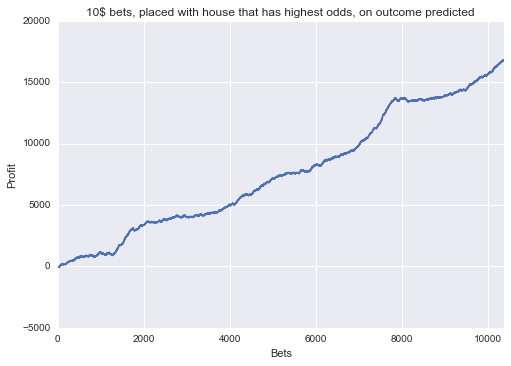

In [60]:
profit_ind = profit.reset_index()
profit_ind = profit_ind*10
plt = profit_ind[0].plot()
print
print
plt.set_title("10$ bets, placed with house that has highest odds, on outcome predicted")
plt.set_xlabel("Bets")
plt.set_ylabel("Profit")
plt

In [66]:
profit_ind

,index,0
0,0,0.00
1,0,-10.00
2,0,-20.00
3,0,-30.00
4,0,-40.00
5,0,-32.70
6,0,-42.70
7,0,-37.70
8,0,-47.70
9,0,-34.70


In [ ]:




print "For betting on home winning:"
print "Total amount bet:  ",   pred_win.sum()
print "Total amount lost: ",   losses.sum()
print "Amount won on correct bets: ", all_win_bets.sum()
print "Total profit:      ",  all_win_bets.sum() - pred_win.sum()
    

In [554]:
all_lose_bets = (home_lose_odd_max*pred_win)
all_lose = (pred_lose*correct_lose*home_lose_odd_max)
incor_lose = correct_lose.apply(lambda x: (x-1)**2)
losses = correct_win - pred_win


print "Total amount bet:  ",   all_lose_bets.sum()
print "Total amount lost: ", incor_lose.sum()
print "Total profit:      ",  

Total amount bet:   48348.441
Total amount lost:  10130
Total profit:      


In [350]:
all_draw_bets = (draw_odd_max*pred_draw).sum()
all_draw = (pred_draw*correct_draw*draw_odd_max).sum()
incor_draw = correct_draw.apply(lambda x: (x-1)**2)


print "Total amount bet:  ",   all_draw_bets
print "Total amount lost: ", incor_draw.sum()
print "Total profit:      ",  all_draw_bets - incor_draw.sum()

Total amount bet:   452.96
Total amount lost:  10280
Total profit:       -9827.04


In [258]:
predict_win = 0
actual_win = 0
for i in y_pred:
    for j in y_test:
        if j==1:
            actual_win = actual_win+1
        if i==1 and i==j:
            predict_win = predict_win + 1


print predict_win
print actual_win
print float(predict_win)/float(actual_win)

KeyboardInterrupt: 

In [40]:
matches_num=matches

In [194]:
matches

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


In [196]:
def get_winner(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 1
    elif row['home_team_goal'] < row['away_team_goal']:
        return 2
    else:
        return 0

matches['winner'] = matches.apply(lambda row: get_winner(row), axis = 1)
matches.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,winner
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,0
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,2


In [198]:
for i in matches.columns :
    print i
    
matches = matches.drop(["goal","shoton","shotoff","foulcommit","card","cross","corner","possession"])

id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
a

ValueError: labels ['country_id' 'league_id' 'goal' 'shoton' 'shotoff' 'foulcommit' 'card'
 'cross' 'corner' 'possession'] not contained in axis

In [203]:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
matches_no_winner = matches.drop("winner",1)
winner = matches[["winner"]]

In [44]:
"""
Detailed attributes from the EA Sports FIFA video game series. Players stats are updated frequently and paint 
a fairly accurate picture of the player's skillset. Unlike Baseball, soccer doesn't have a lot of consistent statistics to measure 
actual performance on the field, but this is a decent proxy (though obviously subject to the biases of the EA Sports team 
assessing player's ratings)
"""
playerstats.head(5)

,id,player_fifa_api_id,player_api_id,date_stat,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [45]:
matches.tail()

,season,stage,date,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,...,GBD,GBA,BSH,BSD,BSA,country,league,home_team,away_team,winner
25940,2015/2016,9,2015-09-22 00:00:00,1,0,42231.0,678384.0,95220.0,638592.0,413155.0,...,NaN,NaN,NaN,NaN,NaN,Switzerland,Switzerland Super League,St. Gallen,Thun,home
25941,2015/2016,9,2015-09-23 00:00:00,1,2,33272.0,41621.0,25813.0,257845.0,114735.0,...,NaN,NaN,NaN,NaN,NaN,Switzerland,Switzerland Super League,FC Vaduz,Luzern,away
25942,2015/2016,9,2015-09-23 00:00:00,2,0,157856.0,274779.0,177689.0,294256.0,42258.0,...,NaN,NaN,NaN,NaN,NaN,Switzerland,Switzerland Super League,Grasshopper,Sion,home
25943,2015/2016,9,2015-09-22 00:00:00,0,0,NaN,8881.0,173534.0,39646.0,282287.0,...,NaN,NaN,NaN,NaN,NaN,Switzerland,Switzerland Super League,Lugano,FC Zuerich,tie
25944,2015/2016,9,2015-09-23 00:00:00,4,3,274787.0,492132.0,108451.0,25815.0,94553.0,...,NaN,NaN,NaN,NaN,NaN,Switzerland,Switzerland Super League,Young Boys,Basel,home


In [46]:
#list of unique players and attributes
player.head(5)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [178]:
for i in matches.columns:
    print i

stage
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
away_player_5
away_player_6
away_player_7
away_player_8
away_player_9
away_player_10
away_player_11
B365H
B365D
B365A
BWH
BWD
BWA
IWH
IWD
IWA
LBH
LBD
LBA
PSH
PSD
PSA
WHH
WHD
WHA
SJH
SJD
SJA
VCH
VCD
VCA
GBH
GBD
GBA
BSH
BSD
BSA
country
league
home_team
away_team
winner


In [49]:
import numpy as np
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

In [190]:
matches_dummy = pd.get_dummies(matches)


In [249]:
for i in matches.columns:
    print i

id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
a

In [211]:


#     takeaway:
#goal
#shoton
#shotoff
#foulcommit
#card
#cross
#corner
#possession

matches_no_outcomes = matches_dummy.drop(["winner_away",'winner_home',"winner_tie","goal","shoton","shotoff","foulcommit","card","cross","corner","possession"],1)

matches_no_outcomes = matches_no_outcomes.replace([np.inf, -np.inf, np.nan], 0)

ValueError: labels ['winner_away' 'winner_home' 'winner_tie' 'goal' 'shoton' 'shotoff'
 'foulcommit' 'card' 'cross' 'corner' 'possession'] not contained in axis

In [237]:
#X = matches_dummy.as_matrix().astype(np.float)


In [255]:
y_pred

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

5607

In [139]:
result.columns

Index([u'prediction', u'actual'], dtype='object')

In [123]:
pd.table(y_test_pred_df,y_test_df)

AttributeError: 'module' object has no attribute 'table'

In [ ]:
print 'Train LogisticRegression()'
clf_init = LogisticRegression();
clf_init.fit(X_train, y_train);
print 'Train LogisticRegression() is done'

print 'Train with clf_init = LogisticRegression()'
class init:
    def __init__(self, est):
        self.est = est
    def predict(self, X):
        return self.est.predict_proba(X)[:,1][:,numpy.newaxis]
    def fit(self, X, y):
        self.est.fit(X, y)
clf = GradientBoostingClassifier(learning_rate=0.1,
                             n_estimators=5, subsample=0.3,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_depth=3,
                             init=clf_init,
                             random_state=None,
                             max_features=None,
                             verbose=2)

clf.fit(X_train, y_train) # <------ ERROR!!!!
print 'Train with clf_init = LogisticRegression() is done'

In [102]:
np.nan_to_num(y_train)

SyntaxError: invalid syntax (<ipython-input-102-78871a74f1b9>, line 1)